In [109]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random
## increse recursion limit
import sys
sys.setrecursionlimit(5000)

%matplotlib inline

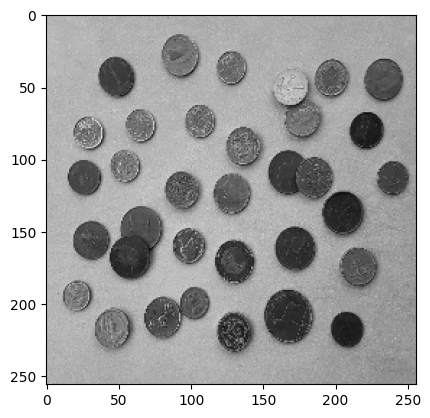

256 256


In [110]:
import cv2
import matplotlib.pyplot as plt

# Ler a imagem
img = cv2.imread("coins-01.jpg")

# Verificar se a imagem foi carregada corretamente
if img is None:
    print("Erro ao carregar a imagem.")
else:
    # Redimensionar a imagem para 256x256 pixels
    img = cv2.resize(img, (256, 256))

    # Converter a imagem para diferentes espaços de cor
    imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Exibir a imagem em escala de cinza
    plt.imshow(imgGray, cmap='gray')
    plt.show()

    # Obter e imprimir as dimensões da imagem em escala de cinza
    N, M = imgGray.shape
    print(N, M)

In [111]:
elemento = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

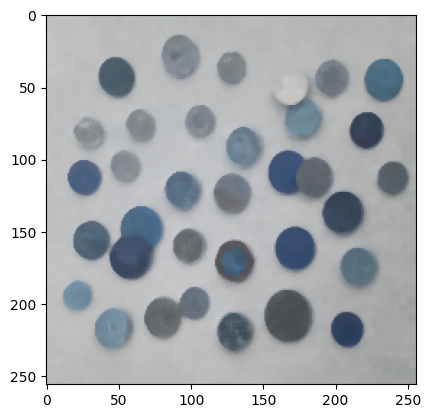

In [112]:
imgR = cv2.medianBlur(img,5)
plt.imshow(imgR,cmap='gray')

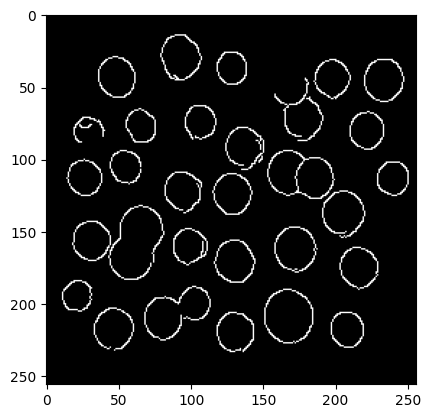

In [113]:
## algorith detection of edges
imgCanny = cv2.Canny(imgR,100,200)
plt.imshow(imgCanny,cmap='gray')

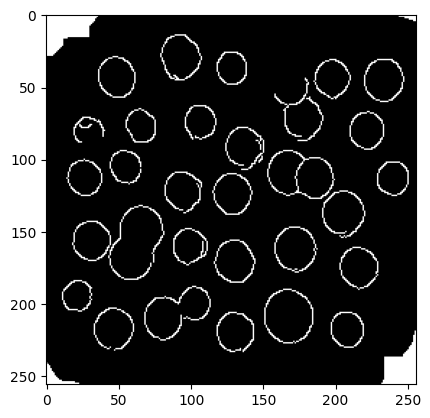

In [114]:
thresh = cv2.adaptiveThreshold(imgCanny, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 99, 3)
plt.imshow(thresh,'gray')


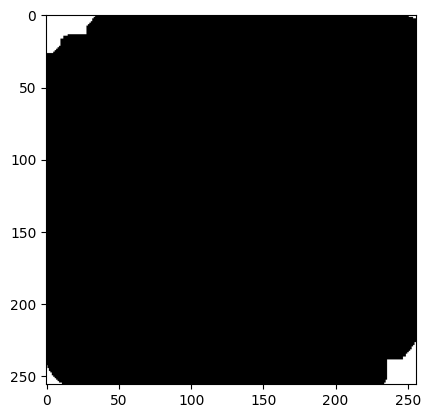

In [115]:
##using erosion and dilation to remove noise
imgErode = cv2.erode(thresh,elemento,iterations = 1)
plt.imshow(imgErode,'gray')

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

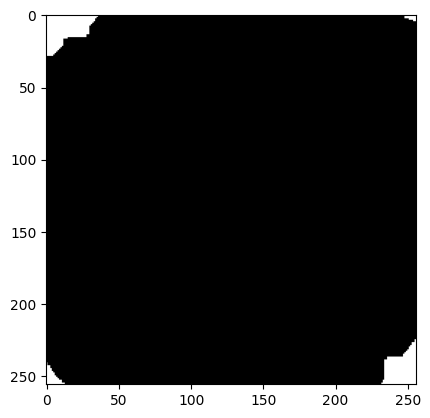

In [116]:
##remove background noise
imgDilate = cv2.dilate(imgErode,elemento,iterations = 1)
plt.imshow(imgDilate,'gray')
imgDilate


In [117]:
#function find the number of islands and numerate them
# the function returns a list of tuples with the number of islands and the list of islands

def find_islands(image):
    visited = np.zeros(image.shape, dtype=np.bool_)
    counter = 0
    component_conexa = np.zeros(image.shape, dtype=np.uint8)

    def get_neighbors(row, col):
        directions = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
        return [(row + x, col + y) for [x, y] in directions if is_valid(row + x, col + y)]

    def is_valid(row, col):
        in_range = 0 <= row <= len(image) - 1 \
                   and 0 <= col <= len(image[0]) - 1
        return in_range and not visited[row][col] and image[row][col] == 255

    def dfs(row, col):
        if visited[row][col]:
             return
        visited[row][col] = True
        component_conexa[row][col] = counter


        for [x, y] in get_neighbors(row, col): dfs(x, y)

    for index_l, line in enumerate(image):
        for index_c, val in enumerate(line):
            if is_valid(index_l, index_c):
                counter += 1
                dfs(index_l, index_c)
                
    return component_conexa, counter


In [118]:
cc,counter = find_islands(imgCanny)
print("Quantidade de Objetos: ", counter)


Quantidade de Objetos:  31


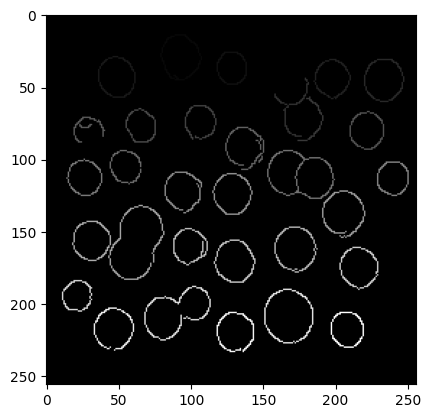

In [119]:
plt.imshow(cc,'gray')


In [120]:
imgCC2RGB = cv2.cvtColor(cc,cv2.COLOR_GRAY2RGB)
imgRes = cv2.cvtColor(cc,cv2.COLOR_GRAY2BGR)
imgRes = cv2.cvtColor(imgRes,cv2.COLOR_BGR2HSV)
imgCC2RGB.shape

(256, 256, 3)

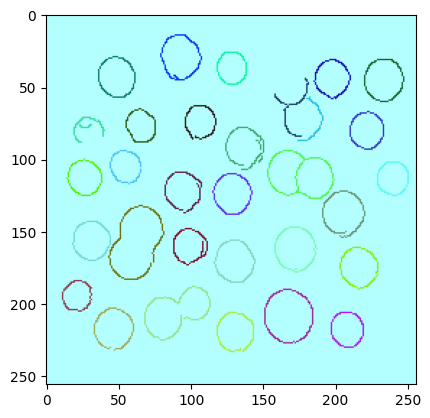

In [125]:
## split the image into 3 channels HSV
h, s, v = cv2.split(imgRes)

s = s + 255
v = v + 255

for i in range(counter):
    ##change Hue
    if i == 0:
        h[cc == i] = 179
    h[cc == i + 1] = 179 * i / counter

## merge the 3 channels
imgRes = cv2.merge((h, s, v))

## display the image
plt.imshow(imgRes)
plt.show()

C:\Users\Tygsv\AppData\Local\Temp\ipykernel_17084\690875938.py:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 279 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  imgCC2RGB[cc==i+1] = [255/counter*i,counter*i,counter/(i+1)]
C:\Users\Tygsv\AppData\Local\Temp\ipykernel_17084\690875938.py:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conversion of 310 to uint8 will fail in the future.
For the old behavior, usually:
    np.array(value).astype(dtype)
will give the desired result (the cast overflows).
  imgCC2RGB[cc==i+1] = [255/counter*i,counter*i,counter/(i+1)]
C:\Users\Tygsv\AppData\Local\Temp\ipykernel_17084\690875938.py:5: DeprecationWarning: NumPy will stop allowing conversion of out-of-bound Python integers to integer arrays.  The conv

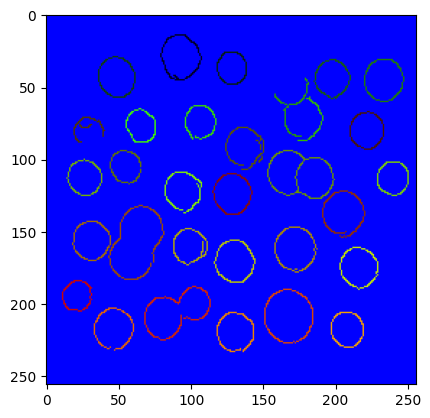

In [122]:
for i in range(counter):
    ##change RGB
    if i == 0:
        imgCC2RGB[cc == i] = [i,i,255]
    imgCC2RGB[cc==i+1] = [255/counter*i,counter*i,counter/(i+1)]

plt.imshow(imgCC2RGB)

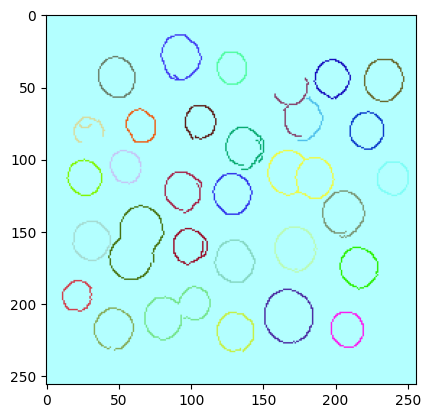

In [123]:
##change color imgRes to random rgb for every equal number in matrix
for i in range(counter):
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    imgRes[cc==i+1] = [r,g,b]
plt.imshow(imgRes)

In [124]:
## print area the number distinct in matrix cc
for i in range(counter):
    print("Objeto ", i+1, ": ", np.sum(cc==i+1))
    


Objeto  1 :  113
Objeto  2 :  80
Objeto  3 :  96
Objeto  4 :  93
Objeto  5 :  102
Objeto  6 :  81
Objeto  7 :  55
Objeto  8 :  83
Objeto  9 :  77
Objeto  10 :  89
Objeto  11 :  69
Objeto  12 :  113
Objeto  13 :  78
Objeto  14 :  170
Objeto  15 :  83
Objeto  16 :  82
Objeto  17 :  100
Objeto  18 :  98
Objeto  19 :  116
Objeto  20 :  159
Objeto  21 :  96
Objeto  22 :  110
Objeto  23 :  98
Objeto  24 :  105
Objeto  25 :  98
Objeto  26 :  76
Objeto  27 :  159
Objeto  28 :  128
Objeto  29 :  96
Objeto  30 :  100
Objeto  31 :  85
